In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from fractions import Fraction

# g=9.8, l=1.0, m₁=10.0, m₂=1.0
# stateSpaceBox =[theta1,velocity1,theta2,velocity2]
# stateSpaceBox = [0 2pi;      -8 +8; 0 +2pi;        -8 8]
dyn = {"g":9.8, "m2": 1.0, "l": 1.0, "m1": 10.0}

v1 = np.array([1, 0, 0, 0], dtype=np.float32)
v2 = np.array([0, 1, 0, 0], dtype=np.float32)
v3 = np.array([0, 0, 1, 0], dtype=np.float32)
v4 = np.array([0, 0, 0, 1], dtype=np.float32)
x_dot = []
x_norm = []
# cum = np.array([0,0,0])

# def cosin 

def double_pendulum (x0, dyn, action, dt):
    g = dyn['g'] 
    l = dyn['l']
    m1 = dyn['m1']
    m2 = dyn['m2']
    #print (x0)
    f = np.array([x0[1],
                  ((-(1.25 + 0.5*np.cos(x0[2]))*(((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) - 4.9*np.cos(x0[0] + x0[2]) - 0.5*(x0[1]**2)*np.sin(x0[2]))) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) + 0.5*(x0[3]**2)*np.sin(x0[2]) + np.sin(x0[2])*x0[1]*x0[3] - 4.9*np.cos(x0[0] + x0[2]) - 14.7*np.cos(x0[0])) / (3.5 + np.cos(x0[2])),
                  x0[3],
                  (((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) - 4.9*np.cos(x0[0] + x0[2]) - 0.5*(x0[1]**2)*np.sin(x0[2])) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))
                 ], dtype=np.float32)
    
    
    g = np.array([0,
                  (-1.25 - 0.5*np.cos(x0[2])) / ((1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))*(3.5 + np.cos(x0[2]))),
                  0,
                  1 / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))
                 ], dtype=np.float32)
    return x0 + f*dt + g*dt*action

def linearized_double_pendulum (identity, dyn, x0):
    g = dyn['g'] 
    l = dyn['l']
    m1 = dyn['m1']
    m2 = dyn['m2']
    led_double_pendulum = np.array([[0, 1, 0, 0],
                             [(((-1.25 - 0.5*np.cos(x0[2]))*(((1.25 + 0.5*np.cos(x0[2]))*(-4.9*np.sin(x0[0] + x0[2]) - 14.7*np.sin(x0[0]))) / (3.5 + np.cos(x0[2])) + 4.9*np.sin(x0[0] + x0[2]))) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) + 4.9*np.sin(x0[0] + x0[2]) + 14.7*np.sin(x0[0])) / (3.5 + np.cos(x0[2])),
                              (((-1.25 - 0.5*np.cos(x0[2]))*((-(1.25 + 0.5*np.cos(x0[2]))*np.sin(x0[2])*x0[3]) / (3.5 + np.cos(x0[2])) - np.sin(x0[2])*x0[1])) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) + np.sin(x0[2])*x0[3]) / (3.5 + np.cos(x0[2])),
                              (((-1.25 - 0.5*np.cos(x0[2]))*(((1.25 + 0.5*np.cos(x0[2]))*(-4.9*np.sin(x0[0] + x0[2]) - 0.5*(x0[3]**2)*np.cos(x0[2]) - np.cos(x0[2])*x0[1]*x0[3]) - 0.5*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])*np.sin(x0[2])) / (3.5 + np.cos(x0[2])) + 4.9*np.sin(x0[0] + x0[2]) + (((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / ((3.5 + np.cos(x0[2]))**2))*np.sin(x0[2]) - 0.5*(x0[1]**2)*np.cos(x0[2])) - 0.5*((-(1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) + 4.9*np.cos(x0[0] + x0[2]) + 0.5*(x0[1]**2)*np.sin(x0[2]))*np.sin(x0[2])) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) + 4.9*np.sin(x0[0] + x0[2]) + 0.5*(x0[3]**2)*np.cos(x0[2]) + np.cos(x0[2])*x0[1]*x0[3] - (((-((1.25 + 0.5*np.cos(x0[2]))**2)) / ((3.5 + np.cos(x0[2]))**2))*np.sin(x0[2]) + (0.5*(2.5 + np.cos(x0[2]))*np.sin(x0[2])) / (3.5 + np.cos(x0[2])))*((-(1.25 + 0.5*np.cos(x0[2]))*(((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) - 4.9*np.cos(x0[0] + x0[2]) - 0.5*(x0[1]**2)*np.sin(x0[2]))) / ((1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))**2))) / (3.5 + np.cos(x0[2])) + (((-(1.25 + 0.5*np.cos(x0[2]))*(((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) - 4.9*np.cos(x0[0] + x0[2]) - 0.5*(x0[1]**2)*np.sin(x0[2]))) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) + 0.5*(x0[3]**2)*np.sin(x0[2]) + np.sin(x0[2])*x0[1]*x0[3] - 4.9*np.cos(x0[0] + x0[2]) - 14.7*np.cos(x0[0])) / ((3.5 + np.cos(x0[2]))**2))*np.sin(x0[2]),
                              (((-1.25 - 0.5*np.cos(x0[2]))*(1.25 + 0.5*np.cos(x0[2]))*(-np.sin(x0[2])*x0[1] - np.sin(x0[2])*x0[3])) / ((1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))*(3.5 + np.cos(x0[2]))) + np.sin(x0[2])*x0[1] + np.sin(x0[2])*x0[3]) / (3.5 + np.cos(x0[2]))],
                                    [0, 0, 0, 1],
                             [(((1.25 + 0.5*np.cos(x0[2]))*(-4.9*np.sin(x0[0] + x0[2]) - 14.7*np.sin(x0[0]))) / (3.5 + np.cos(x0[2])) + 4.9*np.sin(x0[0] + x0[2])) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))),
                              ((-(1.25 + 0.5*np.cos(x0[2]))*np.sin(x0[2])*x0[3]) / (3.5 + np.cos(x0[2])) - np.sin(x0[2])*x0[1]) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))),
                              (((1.25 + 0.5*np.cos(x0[2]))*(-4.9*np.sin(x0[0] + x0[2]) - 0.5*(x0[3]**2)*np.cos(x0[2]) - np.cos(x0[2])*x0[1]*x0[3]) - 0.5*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])*np.sin(x0[2])) / (3.5 + np.cos(x0[2])) + 4.9*np.sin(x0[0] + x0[2]) + (((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / ((3.5 + np.cos(x0[2]))**2))*np.sin(x0[2]) - 0.5*(x0[1]**2)*np.cos(x0[2])) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) - ((((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) - 4.9*np.cos(x0[0] + x0[2]) - 0.5*(x0[1]**2)*np.sin(x0[2])) / ((1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))**2))*(((-((1.25 + 0.5*np.cos(x0[2]))**2)) / ((3.5 + np.cos(x0[2]))**2))*np.sin(x0[2]) + (0.5*(2.5 + np.cos(x0[2]))*np.sin(x0[2])) / (3.5 + np.cos(x0[2]))),
                              ((1.25 + 0.5*np.cos(x0[2]))*(-np.sin(x0[2])*x0[1] - np.sin(x0[2])*x0[3])) / ((1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))*(3.5 + np.cos(x0[2])))]
                                   ], dtype=np.float32)
    pre_dot = np.dot(led_double_pendulum, identity)
    return pre_dot


def RungeKutta (dyn, f, dt, x0):
    k1 = f(x0, dyn, action/4) #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn)
    k3 = f(x0 + 0.5*k2*dt, dyn)
    k4 = f(x0 + k3*dt, dyn)
    
    x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) *dt
    return x

def RungeKutta_linearized (dyn, f, dt, x0, y):
    k1 = f(x0, dyn, y) #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn, y)
    k3 = f(x0 + 0.5*k2*dt, dyn, y)
    k4 = f(x0 + k3*dt, dyn, y)
    
    x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) * dt

    return x


def f_t_le (dyn, f, linearized_f, dt, x0, T):
    x = np.empty(shape=(len(x0),T), dtype=np.float32)
    v1_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v2_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v3_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v4_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    x[:, 0] = x0
    v1_prime[:, 0] = v1
    v2_prime[:, 0] = v2
    v3_prime[:, 0] = v3
    v4_prime[:, 0] = v4
    cum = np.array([0,0,0,0], dtype=np.float32)
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1])
        
        v1_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v1_prime[:, i-1], x[:, i-1])
        v2_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v2_prime[:, i-1], x[:, i-1])
        v3_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v3_prime[:, i-1], x[:, i-1])
        v4_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v4_prime[:, i-1], x[:, i-1])
        
#         print (v4_prime[:, i])
#         input()
        norm1 = np.linalg.norm(v1_prime[:, i])
        v1_prime[:, i] = v1_prime[:, i]/norm1
        
        GSC1 = np.dot(v2_prime[:, i], v1_prime[:, i])
        
        v2_prime[:, i] = v2_prime[:, i] - GSC1*v1_prime[:, i]
        norm2 = np.linalg.norm(v2_prime[:, i])
        v2_prime[:, i] = v2_prime[:, i]/norm2
        
        GSC2 = np.dot(v3_prime[:, i], v1_prime[:, i])
        GSC3 = np.dot(v3_prime[:, i], v2_prime[:, i])
        
        v3_prime[:, i] = v3_prime[:, i] - GSC2*v1_prime[:, i] - GSC3*v2_prime[:, i]
        norm3 = np.linalg.norm(v3_prime[:, i])
        v3_prime[:, i] = v3_prime[:, i]/norm3
        
        GSC4 = np.dot(v4_prime[:, i], v1_prime[:, i])
        GSC5 = np.dot(v4_prime[:, i], v2_prime[:, i])
        GSC6 = np.dot(v4_prime[:, i], v3_prime[:, i])
         
        v4_prime[:, i] = v4_prime[:, i] - GSC4*v1_prime[:, i] - GSC5*v2_prime[:, i] - GSC6*v3_prime[:, i]
        norm4 = np.linalg.norm(v4_prime[:, i])
        
        v4_prime[:, i] = v4_prime[:, i]/norm4
        
        cum = cum + np.log2(np.array([norm1,norm2,norm3,norm4]))
#         if ( i % 100 == 0 ):
#             print ('log2:', np.log2(np.array([norm1,norm2,norm3]))/(i*dt))
#             print ('cum:', cum/(i*dt))
        
        
    return x, cum/(T*dt)

def f_t (dyn, f, dt, x0, T, action):
    x = np.empty(shape=(len(x0),T))
    #print(x.shape)
    x[:, 0] = x0
    # print ('x:', x)
    # print ('x[:, 0]:', x[:, 0])
    # print ('x0:', x0)
    for i in range(1,T):
        x[:, i] = double_pendulum(x[:, i-1], dyn, action, dt )
    return x

In [2]:
x0 = np.array([-3.1404978341333045 , 0       , 0.010102942221729253, 0        ])
x1 = f_t (dyn, double_pendulum, 0.01, x0, 300,0)

In [3]:
x1

array([[-3.14049783, -3.14049783, -3.13987637, ..., -2.60725957,
        -2.59219457, -2.5762273 ],
       [ 0.        ,  0.06214677,  0.12429358, ...,  1.50650069,
         1.59672625,  1.68539767],
       [ 0.01010294,  0.01010294,  0.00962488, ...,  8.1870331 ,
         8.2133348 ,  8.23846748],
       [ 0.        , -0.04780666, -0.09561354, ...,  2.63017011,
         2.51326867,  2.39660523]])

In [27]:
x2 = f_t (dyn, double_pendulum, 0.01, x1.T[1], 2,-1)

In [29]:
x2.T

array([[ 1.57079633e+00, -6.82926830e-03,  0.00000000e+00,
         1.75609756e-02],
       [ 1.57072803e+00, -6.93889390e-18,  1.75609748e-04,
         6.93889390e-18]])

In [48]:
x, le = f_t_le(dyn, double_pendulum, linearized_double_pendulum, 0.01, x0, 500)

NameError: name 'action' is not defined

In [4]:
le

array([ 0.9583643 ,  0.03067423,  0.17480358, -1.1906745 ], dtype=float32)

In [7]:
x.T

array([[ 1.5707964e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.5707623e+00, -6.8302508e-03,  8.7810062e-05,  1.7563056e-02],
       [ 1.5706598e+00, -1.3666425e-02,  3.5130276e-04,  3.5138611e-02],
       ...,
       [-1.5767479e+01, -5.1376672e+00,  3.5925877e+01,  1.0427855e+01],
       [-1.5818844e+01, -5.1362658e+00,  3.6030659e+01,  1.0529717e+01],
       [-1.5870224e+01, -5.1407633e+00,  3.6136501e+01,  1.0640527e+01]],
      dtype=float32)

Text(0.5, 0.98, 'Cartpole')

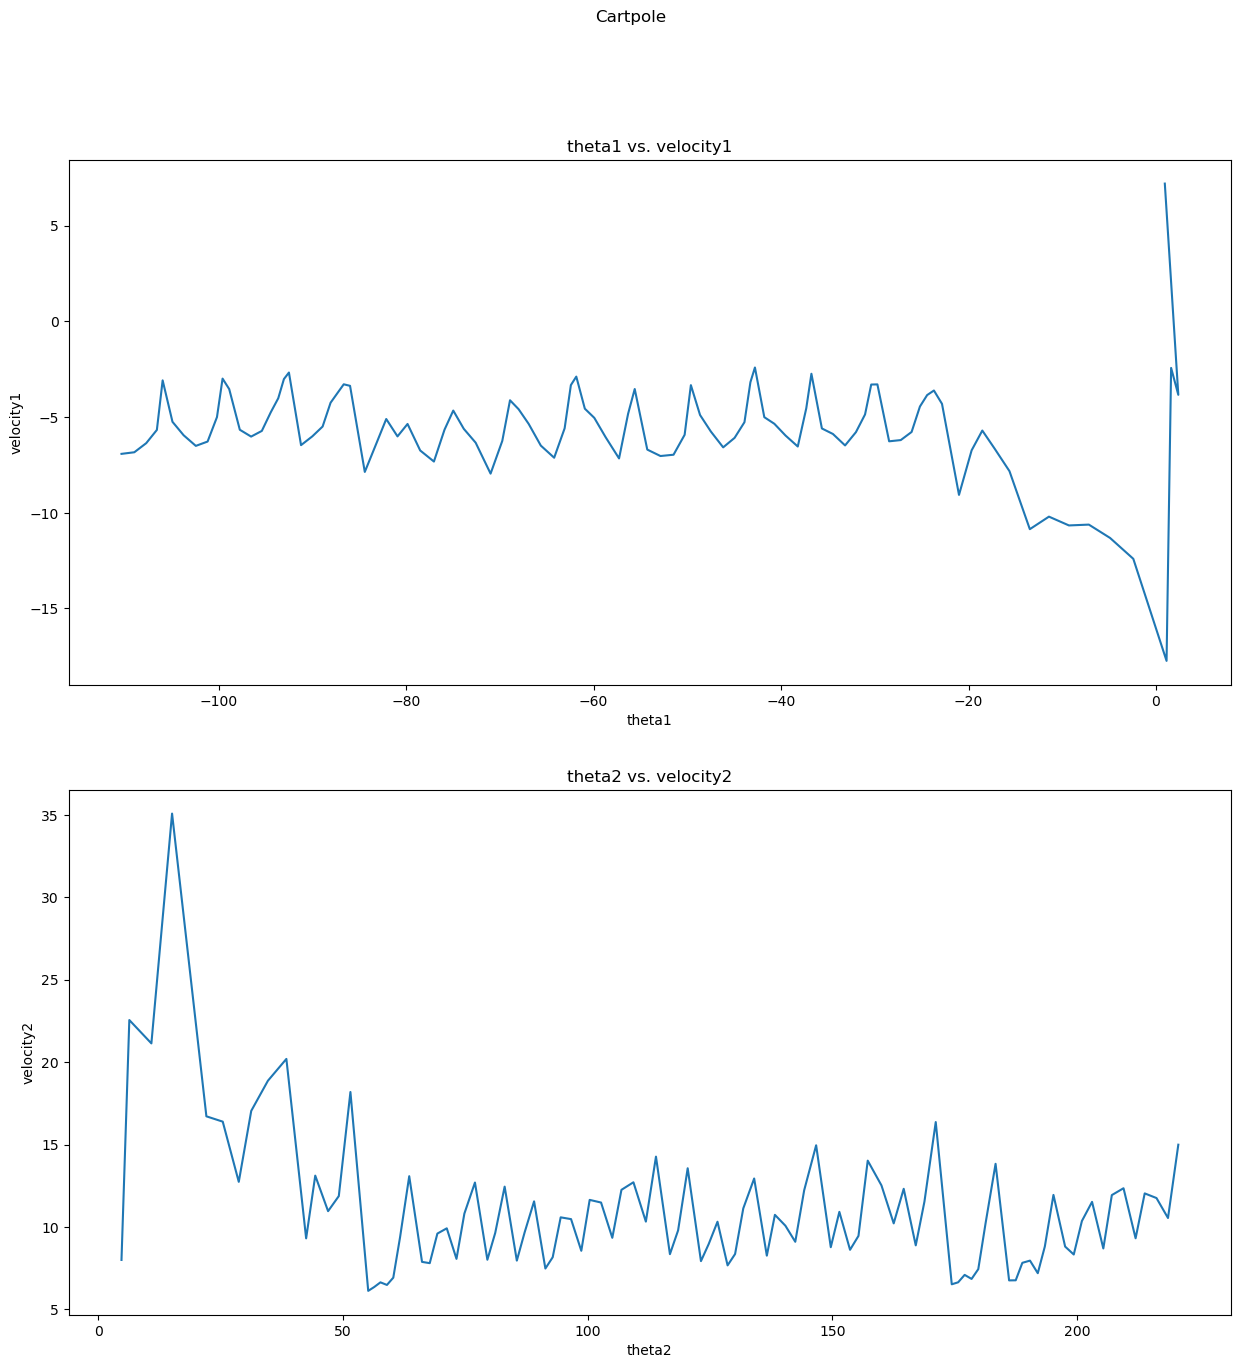

In [5]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211)
ax.set_title('theta1 vs. velocity1')
ax.set_xlabel('theta1')
ax.set_ylabel('velocity1')
plot = ax.plot(x1[0],x1[1])

ax1 = fig.add_subplot(212)
ax1.set_title('theta2 vs. velocity2')
ax1.set_xlabel('theta2')
ax1.set_ylabel('velocity2')
plot = ax1.plot(x1[2],x1[3])

fig.suptitle('Cartpole')

In [49]:
# stateSpaceBox = [0 2pi;      -8 +8; 0 +2pi;        -8 8]
T = 500
test = np.array([  np.random.uniform(-np.pi, 1.5*np.pi, size=(500)), 
                 np.random.uniform(-np.pi, 1.5*np.pi, size=(500)),
                np.random.uniform(-np.pi, 1.5*np.pi, size=(500)),
                np.random.uniform(-np.pi, 1.5*np.pi, size=(500))])
# new_test = np.append(test.T,np.array([[np.pi,0]]),axis=0)

cum_list = []
for i in test.T:
#     x = f_t_le(dyn, cartpole, linearized_cartpole, 0.001, x0, 500)
    _, cum = f_t_le(dyn, double_pendulum, linearized_double_pendulum, 0.0001, i, T)
    cum_list.append(cum)
zs = np.array([max(i) for i in cum_list])  


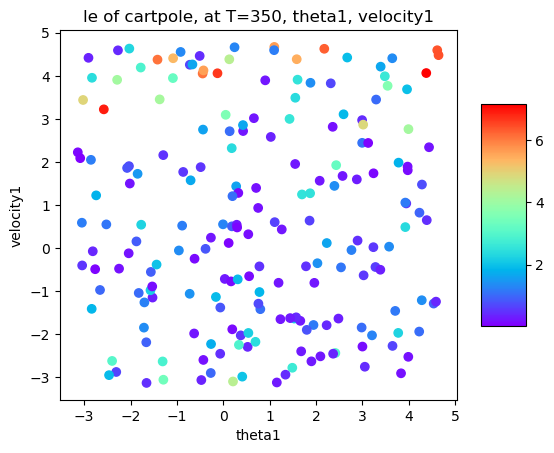

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = ax.scatter(test[0], test[1], c=zs, cmap=plt.cm.rainbow,vmin=zs.min(), vmax=zs.max())
cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
ax.set_xlabel('theta1')
ax.set_ylabel('velocity1')
plt.title ('le of cartpole, at T=350, theta1, velocity1')
plt.show()

In [108]:
X = np.array(np.meshgrid(np.pi/2,
                      0,
                        np.arange(-np.pi , np.pi, 2),
                        np.arange(-5 , 5, 2)))

In [109]:
X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1]*X.T.shape[2]*X.T.shape[3],4)

In [111]:
cum_list = []
for i in X_reshaped:
#     x = f_t_le(dyn, cartpole, linearized_cartpole, 0.001, x0, 500)
    _, cum = f_t_le(dyn, double_pendulum, linearized_double_pendulum, 0.001, i, 1000)
    cum_list.append(cum)

In [118]:
X.T.shape

(5, 4, 1, 1, 4)

In [120]:
le = np.array(cum_list)

In [121]:
temp = []
for i in le:
    temp.append(((i>0)*i).sum())
    
zs = np.array(temp)

In [127]:
zs.reshape(5, 4)

array([[2.4232402, 3.5802777, 3.4909325, 2.1173112],
       [2.7679174, 3.264649 , 2.9370027, 2.697737 ],
       [3.3238473, 2.7406878, 4.090371 , 3.5383596],
       [3.3238482, 2.7947662, 2.7298672, 2.819216 ],
       [2.767918 , 4.0663347, 3.3693845, 2.946415 ]], dtype=float32)

Text(0.5, 1.0, 'le of double pendulum, at T=1000')

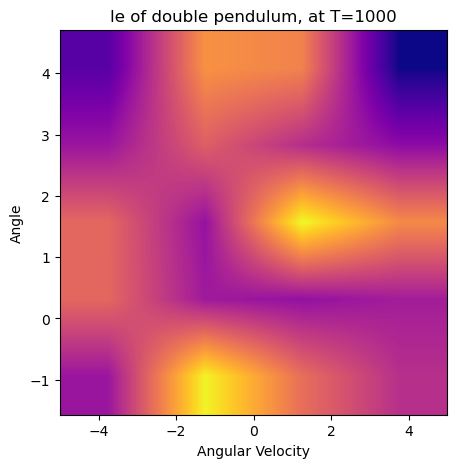

In [128]:

T = 1000
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plot1 = ax.imshow(zs.reshape(5, 4), extent=[-5,5, -np.pi/2 , 3*np.pi/2],aspect='auto',cmap='plasma',interpolation="bilinear")
# ax.plot(tjt[1][1::],tjt[0][1::],linewidth=3)
# cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
ax.set_xlabel('Angular Velocity')
ax.set_ylabel('Angle')
plt.title ('le of double pendulum, at T={}'.format(T))

Text(0.5, 1.0, 'le of double pendulum, at T=1000')

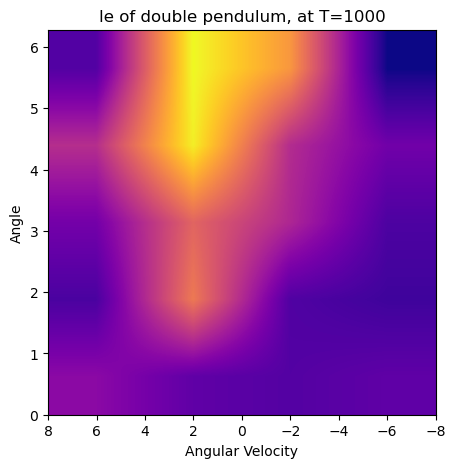

In [102]:

T = 1000
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plot1 = ax.imshow(zs.reshape(5, 4, 4, 5)[:,:,2,2], extent=[8,-8, 0 , 2*np.pi],aspect='auto',cmap='plasma',interpolation="bilinear")
# ax.plot(tjt[1][1::],tjt[0][1::],linewidth=3)
# cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
ax.set_xlabel('Angular Velocity')
ax.set_ylabel('Angle')
plt.title ('le of double pendulum, at T={}'.format(T))

In [30]:
import gym

In [31]:
env = gym.make('Acrobot-v1')

In [45]:

observation = env.reset()
env.render()

# for _ in range(1000):
#     observation = env.step(env.action_space.sample())

#     if terminated or truncated:
#         observation = env.reset()

env.close()


NameError: name 'glPushMatrix' is not defined

In [44]:
!pip install pyglet

  Obtaining dependency information for pyglet from https://files.pythonhosted.org/packages/94/a1/475458ccf34d2996abdb6ef29fa8d3fed2e62f72df5f2a7f4b4b076915c7/pyglet-2.0.9-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 854.7/854.7 kB 1.4 MB/s eta 0:00:001.5 MB/s eta 0:00:01
